In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools


from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
train = pd.read_json("train.json")
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
%matplotlib inline
import gpxpy as gpx
import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

for index, row in train.iterrows():
    #print (row['latitude'], row['longitude'])

    if row['interest_level'] == 'high': #opting for all nominals results in poor performance of Google Earth
        gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)
        gpx.waypoints.append(gps_waypoint)
        
filename = "GoogleEarth_high.gpx"
FILE = open(filename,"w")
FILE.writelines(gpx.to_xml())
FILE.close()

In [4]:
gpx = gpxpy.gpx.GPX()

for index, row in train.iterrows():
    #print (row['latitude'], row['longitude'])

    if row['interest_level'] == 'medium': #opting for all nominals results in poor performance of Google Earth
        gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)
        gpx.waypoints.append(gps_waypoint)
        
filename = "GoogleEarth_medium.gpx"
FILE = open(filename,"w")
FILE.writelines(gpx.to_xml())
FILE.close()

In [5]:
gpx = gpxpy.gpx.GPX()

for index, row in train.iterrows():
    #print (row['latitude'], row['longitude'])

    if row['interest_level'] == 'low': #opting for all nominals results in poor performance of Google Earth
        gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)
        gpx.waypoints.append(gps_waypoint)
        
filename = "GoogleEarth_low.gpx"
FILE = open(filename,"w")
FILE.writelines(gpx.to_xml())
FILE.close()

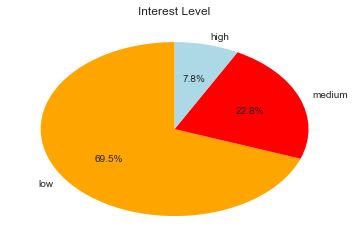

In [6]:
#target variable
labels = ["low","medium","high"]
sizes = train.interest_level.value_counts().values
colors = [  'orange','red','lightblue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)
plt.title("Interest Level")
plt.show()

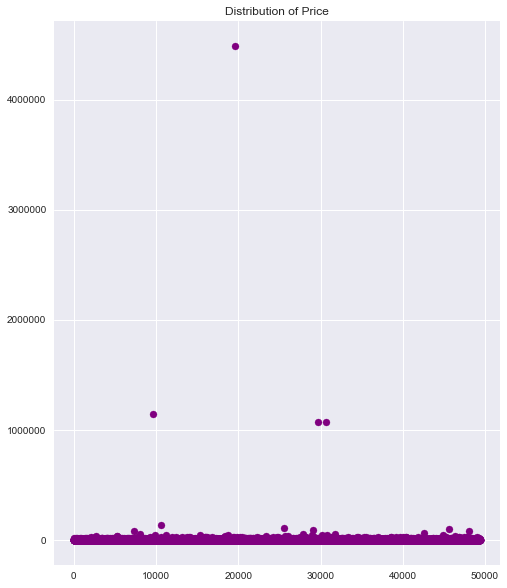

In [7]:
plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



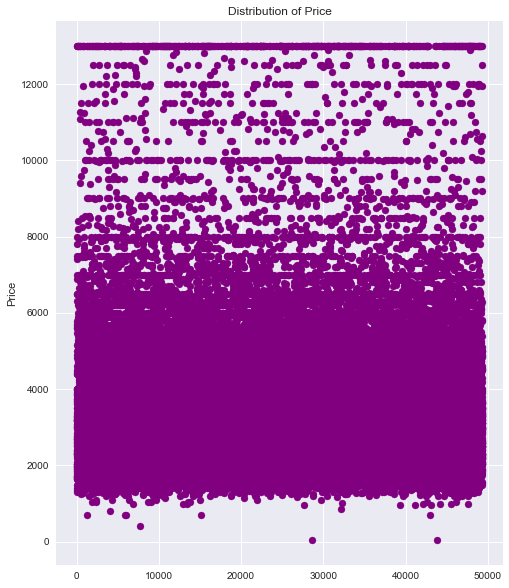

In [8]:
ulimit = np.percentile(train.price.values, 99)
train['price'].ix[train['price']>ulimit] = ulimit


plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.ylabel("Price")
plt.title("Distribution of Price");

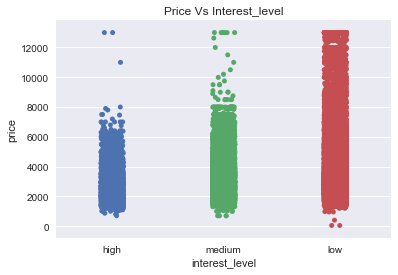

In [9]:
order = ['high', 'medium', 'low']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

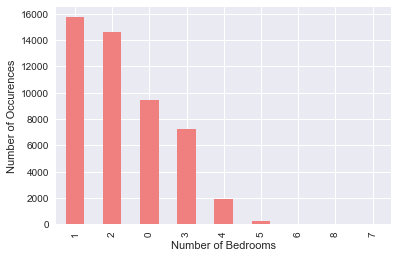

In [10]:
train["bedrooms"].value_counts().plot(kind='bar',color='lightcoral')
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Bedrooms");

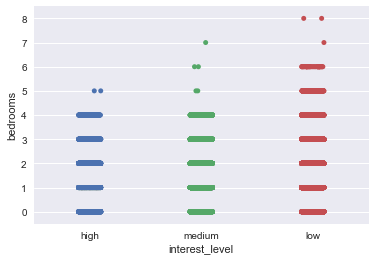

In [11]:
sns.stripplot(y="bedrooms", x="interest_level",data=train,jitter=True,order=order);

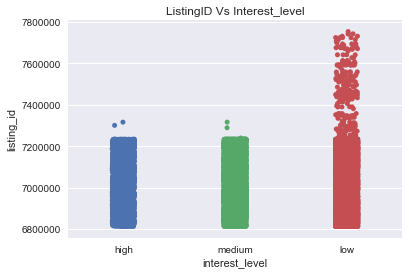

In [12]:
sns.stripplot(train["interest_level"],train["listing_id"],jitter=True,order=order)
plt.title("ListingID Vs Interest_level");

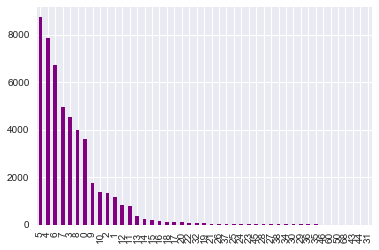

In [13]:
train['num_photos'] = train['photos'].apply(len)
train.num_photos.value_counts().plot(kind='bar',color='purple')

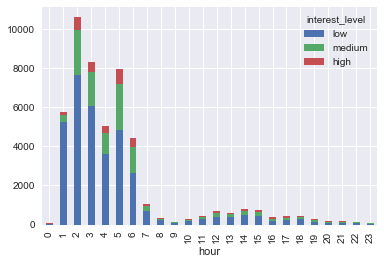

In [14]:
train['created'] = pd.to_datetime(train['created'])
train['hour'] = train['created'].dt.hour
hourDF = train.groupby(['hour', 'interest_level'])['hour'].count().unstack('interest_level').fillna(0)
hourDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

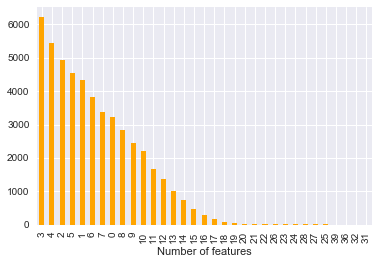

In [15]:
train['num_features'] = train['features'].apply(len)

train.num_features.value_counts().plot(kind='bar',color='orange')
plt.xlabel("Number of features")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



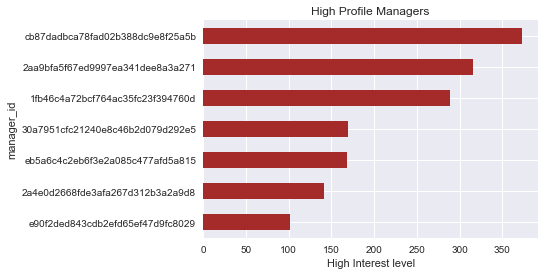

In [16]:
managerDF = train.groupby(['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)
managerDF["sum"]=managerDF.sum(axis=1)
x=managerDF[ (managerDF['sum'] > 100) & (managerDF['high'] > 30)]
managerDF.head()
x.sort_values("sum",inplace=True)
plt.title("High Profile Managers")
plt.xlabel("High Interest level")
plt.ylabel("Manager ID")
x = x[x.index != 'e6472c7237327dd3903b3d6f6a94515a']
x["sum"].plot(kind='barh',color="brown");

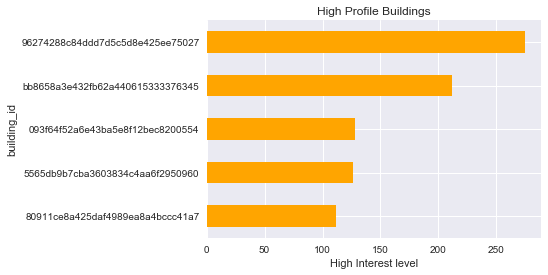

In [17]:
buildingDF = train.groupby(['building_id', 'interest_level'])['building_id'].count().unstack('interest_level').fillna(0)
buildingDF["sum"]=buildingDF.sum(axis=1)
x=buildingDF[ (buildingDF['sum'] > 70) & (buildingDF['high'] > 20)]
buildingDF.head()
#removing the outlier
x = x[x.index != '0']
x.sort_values("sum",inplace=True)
plt.title("High Profile Buildings")
plt.xlabel("High Interest level")
plt.ylabel("Building ID")
x["sum"].plot(kind='barh',color="orange");